<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/QLearningFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

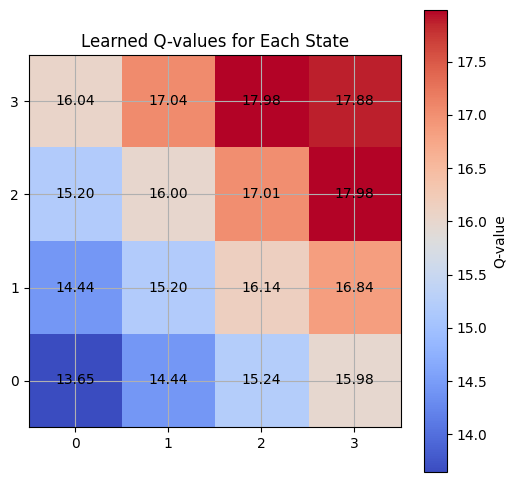

Learned Q-table:
[[12.36937636 13.47397808 12.7397118  13.64676776]
 [12.281622   14.43763576 10.64298041 14.29419322]
 [13.66142936 12.77566076 13.66698487 15.23714324]
 [13.82449994  0.          8.5399632  15.98240693]
 [13.34973907 14.4357843  12.16634938 14.42660407]
 [13.67559448 15.19752725 13.65390476 15.14405525]
 [14.36854171 15.83339324 14.43654054 16.14173644]
 [15.19572999 15.96592278 14.59622857 16.83936515]
 [13.20326046 15.19752639 12.83491916 14.97581022]
 [14.24156154 15.81945715 14.40991874 15.99739714]
 [15.19579888 16.80402369 15.19575549 17.00634644]
 [15.86488177 15.40689558 15.97426257 17.9773127 ]
 [14.09811224 16.03943223 12.39380965 14.07334118]
 [15.06122474 17.04123652 15.18906333 15.99509089]
 [16.05624713 17.98441688 15.99739282 16.97433311]
 [14.9521063  16.60960233 15.52020244 17.8818934 ]]


In [24]:
import numpy as np
import matplotlib.pyplot as plt

class QLearningGridworld:
    def __init__(self, grid_size=4, n_actions=4, goal_state=15,
                 learning_rate=0.8, discount_factor=0.95,
                 exploration_prob=0.2, epochs=1000):

        self.grid_size = grid_size
        self.n_states = grid_size * grid_size
        self.n_actions = n_actions
        self.goal_state = goal_state

        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = exploration_prob
        self.epochs = epochs

        self.Q_table = np.zeros((self.n_states, self.n_actions))

    def get_next_state(self, state, action):
        row, col = divmod(state, self.grid_size)

        if action == 0 and col > 0:               # left
            col -= 1
        elif action == 1 and col < self.grid_size - 1:  # right
            col += 1
        elif action == 2 and row > 0:             # up
            row -= 1
        elif action == 3 and row < self.grid_size - 1:  # down
            row += 1

        return row * self.grid_size + col

    def train(self):
        for _ in range(self.epochs):
            current_state = np.random.randint(0, self.n_states)

            while True:
                # Exploration vs exploitation
                if np.random.rand() < self.epsilon:
                    action = np.random.randint(0, self.n_actions)
                else:
                    action = np.argmax(self.Q_table[current_state])

                next_state = self.get_next_state(current_state, action)

                reward = 1 if next_state == self.goal_state else 0

                # Q-learning update
                self.Q_table[current_state, action] += self.lr * (
                    reward + self.gamma * np.max(self.Q_table[next_state])
                    - self.Q_table[current_state, action]
                )

                if next_state == self.goal_state:
                    break

                current_state = next_state

    def plot_q_values(self):
        q_values_grid = np.max(self.Q_table, axis=1).reshape((self.grid_size, self.grid_size))

        plt.figure(figsize=(6, 6))
        plt.imshow(q_values_grid, cmap='coolwarm', interpolation='nearest')
        plt.colorbar(label='Q-value')
        plt.title('Learned Q-values for Each State')
        plt.xticks(np.arange(self.grid_size), [str(i) for i in range(self.grid_size)])
        plt.yticks(np.arange(self.grid_size), [str(i) for i in range(self.grid_size)])
        plt.gca().invert_yaxis()
        plt.grid(True)

        for i in range(self.grid_size):
            for j in range(self.grid_size):
                plt.text(j, i, f'{q_values_grid[i, j]:.2f}',
                         ha='center', va='center', color='black')

        plt.show()

    def print_q_table(self):
        print("Learned Q-table:")
        print(self.Q_table)


# -------------------------
# Run the Q-learning agent
# -------------------------

agent = QLearningGridworld()
agent.train()
agent.plot_q_values()
agent.print_q_table()
